In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# I. 데이터 살펴보기

In [2]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd

# train 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/DACON/여행상품신청여부예측/data/train.csv')

# test 데이터 불러오기
test = pd.read_csv('/content/drive/MyDrive/DACON/여행상품신청여부예측/data/test.csv')

# sample_submission 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/DACON/여행상품신청여부예측/data/sample_submission.csv')

In [3]:
# 잘 불러와졌는지 확인합니다.
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [4]:
test.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0


In [5]:
sample_submission

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2928,2929,0
2929,2930,0
2930,2931,0
2931,2932,0


In [6]:
# describe 메소드는 수치형 변수들의 기초 통계량을 보여줍니다.
train.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000,1955.000000
mean,978.000000,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895,0.195908
std,564.504207,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000,0.000000
75%,1466.500000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


# II. 데이터 전처리

## 1. 결측치(NA) 처리

In [7]:
# 먼저 결측치가 얼마나 있는지 확인합니다.
na_check = train.isna().sum()

na_check[na_check > 0]

Age                          94
TypeofContact                10
DurationOfPitch             102
NumberOfFollowups            13
PreferredPropertyStar        10
NumberOfTrips                57
NumberOfChildrenVisiting     27
MonthlyIncome               100
dtype: int64

In [8]:
# 해당 열들의 값을 살펴봅시다.
train[na_check[na_check > 0].keys()].head()

,Age,TypeofContact,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,28.0,Company Invited,10.0,4.0,3.0,3.0,1.0,20384.0
1,34.0,Self Enquiry,NaN,4.0,4.0,1.0,0.0,19599.0
2,45.0,Company Invited,NaN,3.0,4.0,2.0,0.0,NaN
3,29.0,Company Invited,7.0,5.0,4.0,3.0,1.0,21274.0
4,42.0,Self Enquiry,6.0,3.0,3.0,2.0,0.0,19907.0


* Age는 Designation과 관련이 있다 생각한다. 따라서 Age가 Na인 데이터의 Designation을 확인하고 Designation에 맞는 평균 나이를 넣어준다.
* 나머지 결측치는 RandomForest01과 같은 방식으로 결측치 처리를 진행한다.

In [9]:
# Occupation별 평균 나이 확인
train.groupby(['Designation']).mean()['Age']

Designation
AVP               48.153846
Executive         32.742775
Manager           37.235747
Senior Manager    41.235880
VP                47.426966
Name: Age, dtype: float64

In [10]:
# pandas의 fillna 메소드를 활용하여 NAN 값을 채워니다.

train_nona = train.copy()

# Designation별 Age 채우기
def change(x):
    if x == 'AVP':
        train_nona['Age'] = train_nona['Age'].fillna(48)
    elif x == 'Executive':
        train_nona['Age'] = train_nona['Age'].fillna(32)
    elif x == 'Manager':
        train_nona['Age'] = train_nona['Age'].fillna(37)
    elif x == 'Senior Manager':
        train_nona['Age'] = train_nona['Age'].fillna(41)
    else:
        train_nona['Age'] = train_nona['Age'].fillna(47)

train_nona['Designation'].apply(change)


# 0 으로 채우는 경우
train_nona.DurationOfPitch = train_nona.DurationOfPitch.fillna(0)

# mean 값으로 채우는 경우
mean_cols = ['NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']
for col in mean_cols:
    train_nona[col] = train_nona[col].fillna(train[col].mean())

# "Unknown"으로 채우는 경우
train_nona.TypeofContact = train_nona.TypeofContact.fillna("Unknown")

# 결과를 확인합니다.
train_nona.isna().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

## 2. 문자형 변수 처리

In [11]:
object_columns = train.columns[train.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

# 해당 칼럼만 보아서 봅시다
train[object_columns]

object 칼럼은 다음과 같습니다 :  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Company Invited,Small Business,Male,Basic,Married,Executive
1,Self Enquiry,Small Business,Female,Deluxe,Single,Manager
2,Company Invited,Salaried,Male,Deluxe,Married,Manager
3,Company Invited,Small Business,Male,Basic,Married,Executive
4,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager
...,...,...,...,...,...,...
1950,Self Enquiry,Small Business,Male,Basic,Single,Executive
1951,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP
1952,Company Invited,Small Business,Female,Basic,Divorced,Executive
1953,Self Enquiry,Small Business,Female,Deluxe,Married,Manager


In [12]:
# sklearn 패키지의 LabelEncoder를 이용하여 변환
from sklearn.preprocessing import LabelEncoder

train_enc = train_nona.copy()

# 모든 문자형 변수에 대해 encoder를 적용합니다.
for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(train_enc[o_col])
    train_enc[o_col] = encoder.transform(train_enc[o_col])

# 결과를 확인합니다.
train_enc

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.000000,0
1,2,34.0,1,3,0.0,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.000000,1
2,3,45.0,0,1,0.0,2,2,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,23624.108895,0
3,4,29.0,0,1,7.0,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.000000,1
4,5,42.0,1,3,6.0,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.000000,0
1951,1952,41.0,1,3,8.0,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.000000,0
1952,1953,38.0,0,3,28.0,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.000000,0
1953,1954,28.0,1,3,30.0,3,1,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.000000,0


## 3. 숫자형 변수 스케일링

In [13]:
# MinMaxScaling을 사용 
# MinnMaxScaling : 해당 칼럼의 값을 최소값 0 ~ 최댓값 1 사이로 변환시켜주는 Scaling 기법

# MinMaxScaler를 준비해줍니다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_scale = train_enc.copy()

# MinMaxScaler는 학습하는 과정을 필요로 합니다.
scaler.fit(train_scale[['Age', 'DurationOfPitch', 'MonthlyIncome']])

# 학습된 scaler를 사용하여 변환해줍니다.
train_scale[['Age', 'DurationOfPitch', 'MonthlyIncome']] = scaler.transform(train_scale[['Age', 'DurationOfPitch', 'MonthlyIncome']])

# 결과를 확인합니다.
train_scale

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,0.232558,0,1,0.277778,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,0.198448,0
1,2,0.372093,1,3,0.000000,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,0.190411,1
2,3,0.627907,0,1,0.000000,2,2,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,0.231619,0
3,4,0.255814,0,1,0.194444,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,0.207560,1
4,5,0.558140,1,3,0.166667,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,0.193565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,0.232558,1,1,0.277778,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,0.201919,0
1951,1952,0.534884,1,3,0.222222,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,0.313223,0
1952,1953,0.465116,0,3,0.777778,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,0.211419,0
1953,1954,0.232558,1,3,0.833333,3,1,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,0.217224,0


## 4. test set에도 적용

In [14]:
# 결측치 처리

# Designation별 Age 채우기
def change(x):
    if x == 'AVP':
        test['Age'] = test['Age'].fillna(48)
    elif x == 'Executive':
        test['Age'] = test['Age'].fillna(32)
    elif x == 'Manager':
        test['Age'] = test['Age'].fillna(37)
    elif x == 'Senior Manager':
        test['Age'] = test['Age'].fillna(41)
    else:
        test['Age'] = test['Age'].fillna(47)

test['Designation'].apply(change)

# 0 으로 채우는 경우
test.DurationOfPitch = test.DurationOfPitch.fillna(0)


# mean 값으로 채우는 경우
mean_cols = ['NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']
for col in mean_cols:
    test[col] = test[col].fillna(test[col].mean())

# "Unknown"으로 채우는 경우
test.TypeofContact = test.TypeofContact.fillna("Unknown")

# 문자형 변수 전처리
for o_col in object_columns:
    encoder = LabelEncoder()
    
    # test 데이터를 이용해 encoder를 학습하는 것은 Data Leakage 입니다! 조심!
    encoder.fit(train_nona[o_col])
    
    # test 데이터는 오로지 transform 에서만 사용되어야 합니다.
    test[o_col] = encoder.transform(test[o_col])

# 숫자형 변수 scaling
# 학습된 scaler를 사용하여 변환해줍니다.
test[['Age', 'DurationOfPitch', 'MonthlyIncome']] = scaler.transform(test[['Age', 'DurationOfPitch', 'MonthlyIncome']])

# 최종 확인
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,0.325581,0,3,0.000000,3,2,2,5.000000,1,3.0,1,1.0,0,2,0,1.0,2,0.191118
1,2,0.651163,1,2,0.305556,3,2,3,3.701827,1,4.0,1,1.0,1,5,0,1.0,2,0.194732
2,3,0.441860,1,3,0.611111,3,2,3,4.000000,1,3.0,1,5.0,0,5,1,0.0,2,0.208174
3,4,0.581395,1,1,1.000000,3,2,3,6.000000,1,3.0,3,6.0,0,3,1,2.0,2,0.224718
4,5,0.162791,1,3,0.194444,1,1,4,4.000000,0,4.0,3,3.0,1,4,1,3.0,1,0.213764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,0.837209,1,1,0.166667,3,1,2,3.000000,4,3.0,2,7.0,0,4,1,1.0,0,0.320727
2929,2930,0.348837,1,1,0.250000,3,0,4,2.000000,1,3.0,3,2.0,0,3,0,1.0,2,0.232734
2930,2931,0.348837,0,1,0.861111,2,2,4,4.000000,1,3.0,0,3.0,0,4,1,1.0,2,0.235334
2931,2932,0.186047,1,1,0.250000,3,2,4,2.000000,0,5.0,3,2.0,0,2,1,3.0,1,0.216036


## 5. 불필요 Feature 제거

* id 컬럼 제거
* 앞서 시각화에서 알아본 바 영업사원의 프레젠테이션과 만족도는 큰 영향을 미치지 못하므로 제거해준다.

In [15]:
train_scale.drop('id', axis =1, inplace = True)
test.drop('id', axis =1, inplace = True)

train_scale.drop('DurationOfPitch', axis =1, inplace = True)
test.drop('DurationOfPitch', axis =1, inplace = True)

train_scale.drop('NumberOfFollowups', axis =1, inplace = True)
test.drop('NumberOfFollowups', axis =1, inplace = True)

train_scale.drop('ProductPitched', axis =1, inplace = True)
test.drop('ProductPitched', axis =1, inplace = True)

train_scale.drop('PitchSatisfactionScore', axis =1, inplace = True)
test.drop('PitchSatisfactionScore', axis =1, inplace = True)

train = train_scale.copy()

In [16]:
train

,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,0.232558,0,1,3,2,3,3.0,1,3.0,0,0,1.0,1,0.198448,0
1,0.372093,1,3,3,1,2,4.0,2,1.0,1,1,0.0,2,0.190411,1
2,0.627907,0,1,2,2,2,4.0,1,2.0,0,1,0.0,2,0.231619,0
3,0.255814,0,1,3,2,3,4.0,1,3.0,0,0,1.0,1,0.207560,1
4,0.558140,1,3,2,2,2,3.0,0,2.0,0,1,0.0,2,0.193565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,0.232558,1,1,3,2,3,3.0,2,2.0,0,1,2.0,1,0.201919,0
1951,0.534884,1,3,2,1,3,5.0,0,1.0,0,1,1.0,0,0.313223,0
1952,0.465116,0,3,3,1,3,3.0,0,7.0,0,1,2.0,1,0.211419,0
1953,0.232558,1,3,3,1,3,3.0,1,3.0,0,1,2.0,2,0.217224,0


In [17]:
test

,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0.325581,0,3,3,2,2,3.0,1,1.0,0,0,1.0,2,0.191118
1,0.651163,1,2,3,2,3,4.0,1,1.0,1,0,1.0,2,0.194732
2,0.441860,1,3,3,2,3,3.0,1,5.0,0,1,0.0,2,0.208174
3,0.581395,1,1,3,2,3,3.0,3,6.0,0,1,2.0,2,0.224718
4,0.162791,1,3,1,1,4,4.0,3,3.0,1,1,3.0,1,0.213764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,0.837209,1,1,3,1,2,3.0,2,7.0,0,1,1.0,0,0.320727
2929,0.348837,1,1,3,0,4,3.0,3,2.0,0,0,1.0,2,0.232734
2930,0.348837,0,1,2,2,4,3.0,0,3.0,0,1,1.0,2,0.235334
2931,0.186047,1,1,3,2,4,5.0,3,2.0,0,1,3.0,1,0.216036


# III. Modeling

## 1. 모델 선택

***랜덤 포레스트란?***<br>
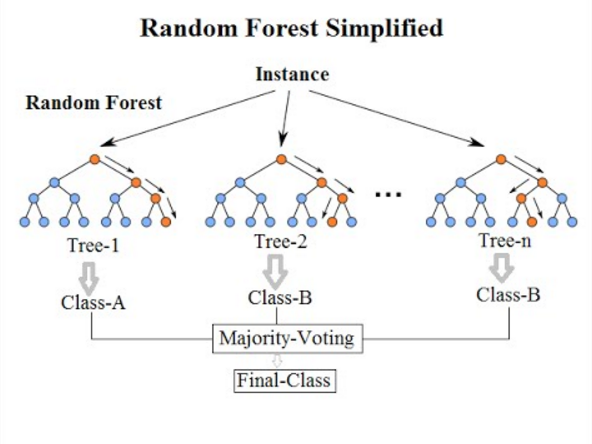<br>
랜덤 포레스트는 대표적인 앙상블(ensemble) 모델의 일종입니다. "여러 개의 트리 모델" 에 "서로 다른 데이터"를 투입하여 나온 결과를 종합하여 가장 많은 투표(Voting)를 얻은 결과를 최종 결과로 선택하는 방식으로 작동합니다.  

이를 통해 과적합(Overfitting)을 방지할 수 있고, 보다 일반화된 성능을 끌어낼 수 있습니다.  

랜덤 포레스트 모델은 sklearn 패키지를 이용해 간단하게 사용할 수 있습니다.  

위 그래프에서 파란색 선 (Linear regression)은 빨간색 점 (Data points)들이 보여주는 x와 y의 관계를 잘 나타내고 있습니다.  

우리는 이처럼 선형 회귀 분석을 통해 x 값이 증가할수록 y 값도 증가한다는 상관 관계를 확인할 수 있으며, 새로운 x 값이 등장했을 때에도 그 x 값에 해당하는 y 값이 어디 쯤에 위치할 지 어느정도 예측할 수 있게 됩니다.  

[참고 블로그](https://lsjsj92.tistory.com/542)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 모델 선언
model = RandomForestClassifier()

## 2. 학습/예측

In [19]:
# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
X = train.drop(columns=['ProdTaken'])
y = train[['ProdTaken']]

In [20]:
# train, test 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 모델 학습
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
prediction = model.predict(X_test)
print("정확도 :{0: .3f}".format(accuracy_score(y_test, prediction)))

정확도 : 0.854


## 3. 랜덤포레스트 하이퍼파라미터

* n_estimators : 결정 트리의 개수. default는 10. 많을수록 좋은 성능이 나올수도 있지만, 무조건적인 것은 아님.
* max_features : 데이터의 feature를 참조할 비율, 개수를 뜻함. default는 auto.
* max_depth : 트리의 깊이
* min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수
* min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수

In [27]:
# 모델 선언
model = RandomForestClassifier()
# grid_search를 활용
model_param_grid = {
    "n_estimators" : [100, 200],
    "max_depth" : [6, 8, 10, 12, 14, 16, 18, 20],
    "min_samples_leaf" : [3, 5, 7, 10],
    "min_samples_split" : [2, 3, 5, 10]
}

In [28]:
model_grid = GridSearchCV(model, 
                          param_grid=model_param_grid, 
                          scoring='accuracy', 
                          n_jobs=-1,
                          verbose=1)
model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [29]:
print("베스트 평균 정확도 : {0: .4f}".format(model_grid.best_score_))
print("베스트 파라미터 :", model_grid.best_params_)

베스트 평균 정확도 :  0.8517
베스트 파라미터 : {'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200}


In [30]:
best_model = model_grid.best_estimator_
pred = best_model.predict(X_test)
accuracy_score(y_test, pred)

0.8414322250639387

In [31]:
# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인
prediction = best_model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[0 0 0 0 1 0 0 0 0 0]


# IV. 데이콘 제출하기

## 1. submission 파일 생성


In [35]:
# 예측된 값을 정답파일과 병합
sample_submission['ProdTaken'] = prediction

# 정답파일 데이터프레임 확인
sample_submission.head()

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1


In [33]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv('submission(Random02).csv',index = False)